<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting single-peak TL data from unfaded samples using the KP-TL equation

As was discussed in the previous chapter, the TL signals from freshly irradiated feldspar samples are termed prompt TL signals, and are analyzed using the analytical KP-TL equation. For practical work fitting experimental data, we use the KP-TL equation equation in the following simplified form (Kitis and Pagonis [Kitis_2013b]):

\begin{equation}
I_{\textrm{TL}}(t)=\frac{A\,F(t)^{2}\,\exp\left[-\rho'\:F(T){}^{3}\right]\left(E^{2}-6k_{B}^{2}T^{2}\right)}{E\:k_{B}\:s\:T^{2}z-2k_{B}^{2}\:s\:T^{3}z+\exp\left[E/\left(k_{B}T\right)\right]E\:\beta}\
\end{equation}

\begin{equation}
F(T)=\ln\left[1+\frac{z\,s\:k_{B}T^{2}}{\beta E}\,e^{-\frac{E}{k_{B}\,T}}\left(1-\frac{2k_{B}T}{E}\right)\right]
\end{equation}

The fitting parameters are the scaling constant A, thermal activation energy $E (eV)$, effective frequency factor $s (s^{-1})$ for the TL process, dimensionless acceptor density $\rho'$ and a constant background bgd (if necessary). Here $\beta$ is the heating rate and z=1.8. Even though this KP-TL equation looks complex, it is rather easy and straightforward to code.

In order to obtain reliable results with the KP-TL equation, one must constraint the code using experimental data, because there are infinite combinations of the parameters E,s,\rho' which will fit the data. It is best to use the known value of $E$, which can be obtained from separate initial rise and $T_{\textrm{max}}-T_{\textrm{stop}}$ experiments (not shown here). In the following code we use E=1.0 eV, a value obtained from a separate analysis using the initial rise method. The least squares fitting parameters in this case are $A, s, \rho'$. 

The scaling factor is bound between the limits $(0,10^{20})$ (a.u.), the $\rho'$ in the range (0,0.02).

It is also important to remember that the physical meaning of the parameter s in the KP-TL equation is an effective frequency factor for the TL process (equal to $s=s_{th}\:s_{tun}/B)$, and not the frequency factor $s_{th}$ for the thermal activation process.

This Python Code shows an example for a sample of $Mg_{4}BO_{7}: Dy,Na$ (MBO) irradiated with a dose of 6 Gy. The TL glow curve for this sample is very wide, similar to the broad glow curves for feldspars. Notice that the KP-TL equation does not describe the TL glow curve very accurately at low temperatures in the Figure produced by the code. This is due to the approximations made during derivation of the KP-TL equation (see the detailed discussion in Kitis and Pagonis [KitisPagonis2014]).

The best fitting parameters are $\rho'=0.0111\pm0.0003$,  s=$7.5\times10^{10} s^{-1}$, B=2.0$\times10^{12}$ and the FOM= 4.1 %. For an extensive analysis of the experimental data for this $Mg_{4}BO_{7}: Dy,Na$ dosimeter using Monte Carlo techniques based on the TA-EST and EST models, see the detailed description in Pagonis et al. [Pagonis2019b]. This material shows strong anomalous fading and its luminescence signals are described well within the EST model.

For more examples of this type of experimental data, see Pagonis et al. [Pagonis2019a], and Polymeris et al.[Polymeris_2017].

+------------+--------+---------+------------+------+
|     B      |  rho   |  d(rho) |  s(s^-1)   | FOM  |
+------------+--------+---------+------------+------+
|   1.99E+12 | 0.0111 | 0.00028 |   7.53E+10 | 4.09 |
+------------+--------+---------+------------+------+


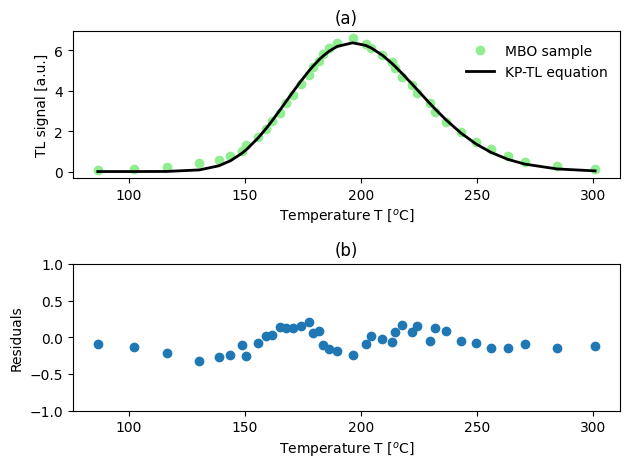

In [ ]:
# Fit TL with KP-TL (Kitis-Pagonis) analytical equation 
from scipy import optimize
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import requests
from prettytable import PrettyTable

# read data file from GitHub
url='https://github.com/vpagonis/EURADOS-2023/raw/main/MBO6gynew.txt'
response = requests.get(url)
a = response.text
b = np.array(list(map(float,a.strip("[]").split())))
data = b.reshape(-1,2)

x_data, y_data = data[:, 0], data[:, 1] 

z,   kB,      En=\
1.8, 8.617E-5,1.0

# function to evaluate the KP-TL equations
def test_func(x, B,rho, s):
    return B* np.exp(-rho*( (np.log(1+z*s*kB*(((x+\
		    273)**2.0)/np.abs(En))*np.exp(-En/(kB*(x+273)))*\
		    (1-2*kB*(x+273)/En)))**3.0))*(En**2.0-6*(kB**2.0)*\
    ((x+273)**2.0))*((np.log(1+z*s*kB*(((x+273)**2.0)/\
		    abs(En))*np.exp(-En/(kB*(x+273)))*(1-2*kB*(x+273)/\
		    En)))**2.0)/(En*kB*s*((x+273)**2)*z-2*(kB**2.0)*\
		    s*z*((x+273)**3.0)+np.exp(En/(kB*(x+273)))*En)
params, cov = optimize.curve_fit(test_func,\
x_data, y_data,bounds=(0,[1e20,.02,1e14]))
drho= round(np.sqrt(cov[1][1]),5)
plt.subplot(2,1, 1)
plt.plot(x_data, y_data,'o', c='lightgreen',label='MBO sample')
plt.plot(x_data, test_func(x_data, *params),
label='KP-TL equation',   c='black',linewidth=2)
plt.title('(a)')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.ylabel('TL signal [a.u.]')
plt.xlabel(r'Temperature T [$^{o}$C]')
#plt.text(400, 1.8e4,'KST4 feldspar')
plt.subplot(2,1, 2)
plt.plot(x_data,test_func(x_data, *params)-y_data,'o',\
label='Residuals')
plt.title('(b)')
plt.ylim(-1,1)
plt.ylabel('Residuals')
plt.xlabel(r'Temperature T [$^{o}$C]')
plt.tight_layout()
B,rho, s=format(params[0],"10.2E"),round(params[1],5),\
format(round(params[2],2),"10.2E")
res=test_func(x_data, *params)-y_data
FOM=round(100*np.sum(abs(res))/np.sum(y_data),2)
myTable=PrettyTable(["B", "rho",  "d(rho)",\
"s(s^-1)","FOM"])  
myTable.add_row([B,rho,drho, s,FOM])
print(myTable)
plt.show()